In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, BatchNormalization, Input,Add,Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [3]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
resnet = ResNet50()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.667271 to fit



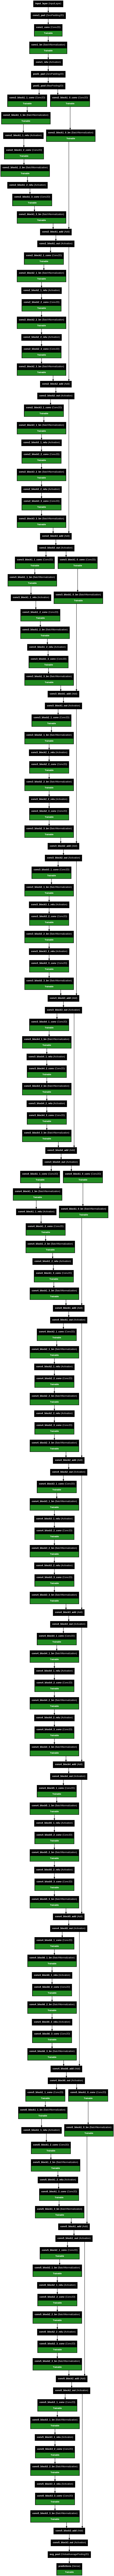

In [5]:
plot_model(resnet, show_layer_names=True, show_trainable=True)

In [6]:
resnet = ResNet50(include_top=False, input_shape=(32,32,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [7]:
resnet.trainable = False

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.674954 to fit



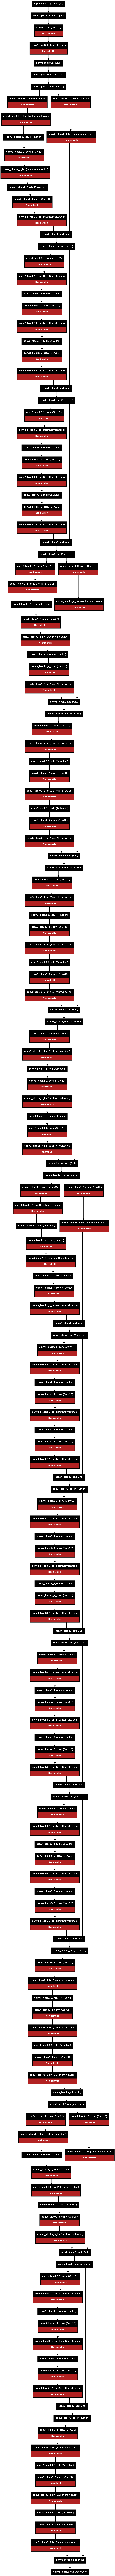

In [8]:
plot_model(resnet, show_layer_names=True, show_trainable=True)

In [9]:
#add flatten
x = Flatten()(resnet.output)


fc1 = Dense(256, activation='relu', name='AddedDense1')(x)
fc2 = Dense(10, activation='softmax', name='AddedDense2')(fc1)

In [10]:
model = Model(inputs=resnet.input, outputs=fc2)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.662776 to fit



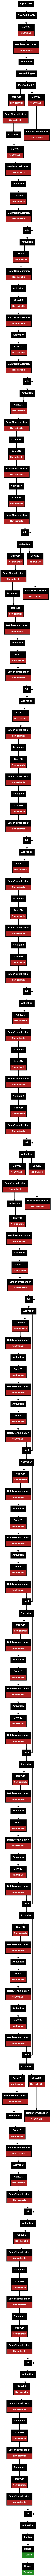

In [11]:
plot_model(model,show_trainable=True)

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - accuracy: 0.5065 - loss: 1.5499 - val_accuracy: 0.5940 - val_loss: 1.1482
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.6280 - loss: 1.0485 - val_accuracy: 0.6069 - val_loss: 1.1541
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6611 - loss: 0.9525 - val_accuracy: 0.6123 - val_loss: 1.1410
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6879 - loss: 0.8743 - val_accuracy: 0.6163 - val_loss: 1.1134
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7062 - loss: 0.8160 - val_accuracy: 0.6115 - val_loss: 1.1634
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7331 - loss: 0.7474 - val_accuracy: 0.6165 - val_loss: 1.2181
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7523 - loss: 0.6927 - val_accuracy: 0.6126 - val_loss: 1.2684
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7755 - loss: 

accuracy      loss  val_accuracy  val_loss
0   0.55602  1.293682        0.5940  1.148158
1   0.62660  1.056777        0.6069  1.154100
2   0.65596  0.967402        0.6123  1.140998

accuracy      loss  val_accuracy  val_loss
7   0.76652  0.649552        0.6137  1.323272
8   0.78494  0.598011        0.6135  1.356800
9   0.80280  0.547463        0.6047  1.426464

<Axes: >

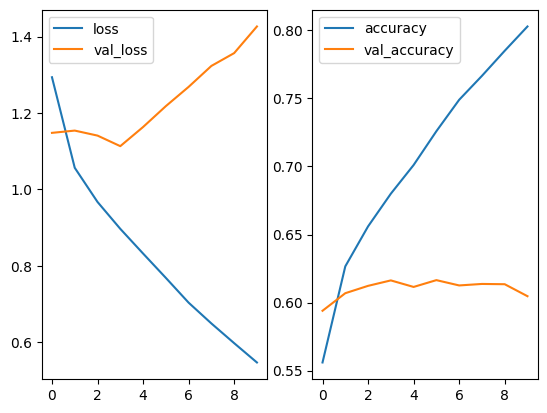

In [15]:
hist_df = pd.DataFrame(history.history)
display(hist_df.head(3))
display(hist_df.tail(3))
fig, axes = plt.subplots(1,2)
hist_df.plot(y=['loss', 'val_loss'], ax= axes[0])
hist_df.plot(y=['accuracy', 'val_accuracy'], ax = axes[1])

In [19]:
import requests
import os
import cv2

def preedict_image(url):
    try:
        response = requests.get(url, stream=True)
        if response.status_code == 200 and 'image' in response.headers['Content-Type']:
            with open("download_image.jpg", "wb") as f:
                f.write(response.content)
        else:
            print("Invalid image URL or content type.")
            return

        img = cv2.imread("download_image.jpg")
        img = cv2.resize(img, (32, 32))
        img = np.expand_dims(img, axis=0)
        img = img / 255.0
        plt.imshow(img[0])
        model.predict(img)
        print(labels[np.argmax(model.predict(img))])

    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        if os.path.exists("download_image.jpg"):
            os.remove("download_image.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
cat


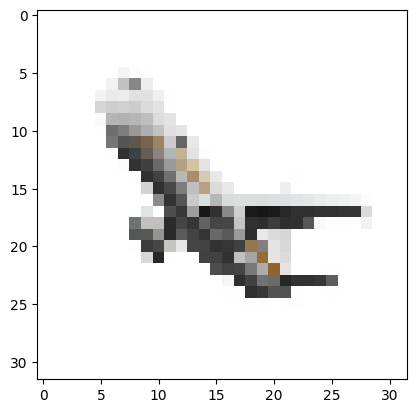

In [21]:
img = 'https://t3.ftcdn.net/jpg/05/27/24/36/240_F_527243669_mhBh7M6Xb9hxg0y2Ug87XfQrlX20suMU.jpg'
preedict_image(img)